[Basic classification: Classify images of clothing](https://www.tensorflow.org/tutorials/keras/classification)

In [34]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

from matplotlib import pyplot as plt

print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.0.0


In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [8]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [13]:
class_names = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover',
               3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 
               7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

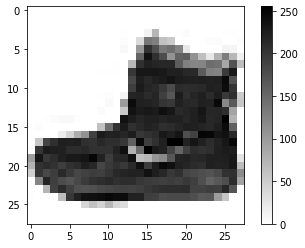

In [17]:
plt.figure()
plt.imshow(X_train[0], cmap='gray_r')
plt.colorbar()
plt.grid(False)
plt.show()

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap='gray_r')
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()

In [27]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.fit(X_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.5015 - accuracy: 0.8237
Epoch 2/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3749 - accuracy: 0.8640
Epoch 3/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3393 - accuracy: 0.8758
Epoch 4/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3135 - accuracy: 0.8835
Epoch 5/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2973 - accuracy: 0.8906
Epoch 6/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2809 - accuracy: 0.8954
Epoch 7/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2693 - accuracy: 0.9000
Epoch 8/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2574 - accuracy: 0.9040
Epoch 9/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2474 - accuracy: 0.9069
Epoch 10/10
60

In [31]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.2%}")

10000/1 - 0s - loss: 0.2616 - accuracy: 0.8755

Test accuracy: 87.55%


In [32]:
prob = model.predict(X_test)

In [35]:
a = np.random.rand(10)

In [44]:
def plot_image(i, img, label, prob):
    img, label, prob = img[i], label[i], prob[i]
    pred = prob.argmax()
    color = 'blue' if pred == label else 'red'

    plt.imshow(img, cmap='gray_r')

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f"{class_names[pred]} {prob.max():.2%} ({class_names[label]})", 
               color=color)
    
def plot_value_array(i, prob, label):
    prob, label = prob[i], label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    plot = plt.bar(range(10), prob, color='gray')
    plt.ylim([0,1])
    pred = prob.argmax()
    plot[pred].set_color('red')
    plot[label].set_color('blue')

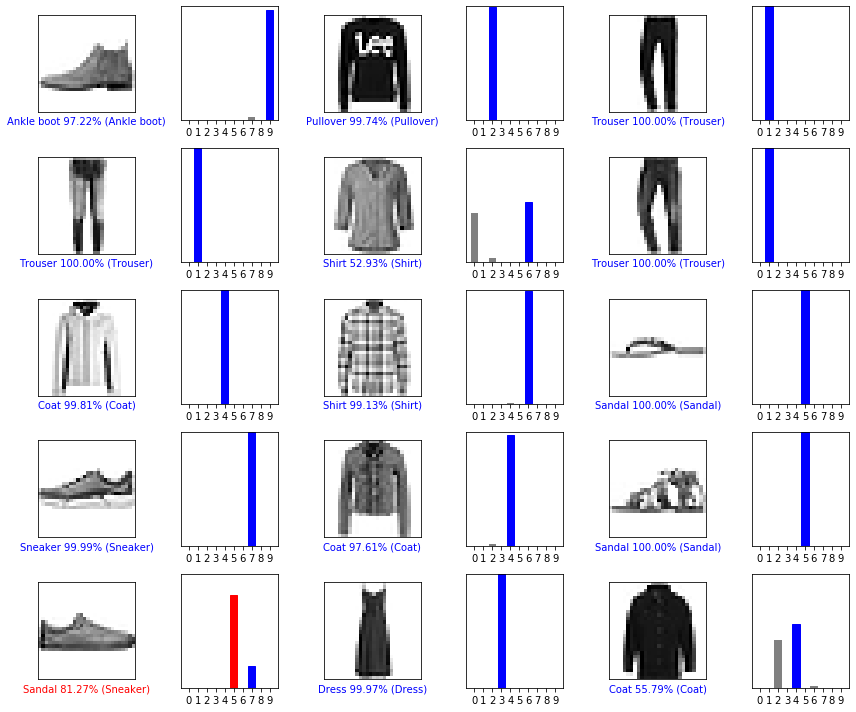

In [45]:
nrow, ncol = 5, 3
nimg = nrow*ncol
plt.figure(figsize=(2*2*ncol, 2*nrow))
for i in range(nimg):
    plt.subplot(nrow, 2*ncol, 2*i+1)
    plot_image(i, X_test, y_test, prob)
    plt.subplot(nrow, 2*ncol, 2*i+2)
    plot_value_array(i, prob, y_test)
plt.tight_layout()